In [48]:
import pandas as pd

# Load the dataset
df = pd.read_excel("StreamSmart.xlsx")

In [50]:
df.shape

(1000, 4)

In [52]:
df.head(5) #show the top 5 rows of a data frame
df.head(100) #show the top 100 rows of a data frame

,ID,Condition,April_Cancellation,May_Cancellation
0,1,A,1,1
1,2,A,0,1
2,3,A,0,0
3,4,A,0,0
4,5,A,0,0
...,...,...,...,...
95,96,A,0,1
96,97,A,0,0
97,98,A,0,0
98,99,A,0,0


In [54]:
df.tail(5) #show the bottom 5 rows of the a data frame
df.tail(100) #show the bottom 100 rows of a data frame

,ID,Condition,April_Cancellation,May_Cancellation
900,901,A,0,0
901,902,A,0,0
902,903,A,0,0
903,904,A,0,0
904,905,A,0,0
...,...,...,...,...
995,996,A,0,0
996,997,A,0,0
997,998,A,0,0
998,999,A,0,0


In [56]:
df.describe() 

,ID,April_Cancellation,May_Cancellation
count,1000.000000,1000.000000,1000.000000
mean,500.500000,0.105000,0.190000
std,288.819436,0.306707,0.392497
min,1.000000,0.000000,0.000000
25%,250.750000,0.000000,0.000000
50%,500.500000,0.000000,0.000000
75%,750.250000,0.000000,0.000000
max,1000.000000,1.000000,1.000000


In [58]:
df.isnull().sum() # To Check if there are any missing values in the data

ID                    0
Condition             0
April_Cancellation    0
May_Cancellation      0
dtype: int64

In [60]:
df.dtypes # Checking the data types of all columns

ID                     int64
Condition             object
April_Cancellation     int64
May_Cancellation       int64
dtype: object

In [62]:
# Convert 'Condition' to a categorical data type
# This conversion won’t affect the outcome but will make processing and memory usage more efficient, which could be useful for future analysis.
df['Condition'] = df['Condition'].astype('category')
# Verify the conversion
df.dtypes

ID                       int64
Condition             category
April_Cancellation       int64
May_Cancellation         int64
dtype: object

In [64]:
# Step 1: Count April Cancellations for Each Condition
# This will give me a quick summary of how many users canceled their subscriptions in April under the two conditions.
# Counting the number of April cancellations for each condition (Group A and Group B)
april_cancellations = df.groupby('Condition')['April_Cancellation'].sum()
# Display the result
print("April Cancellations by Condition:")
print(april_cancellations)

April Cancellations by Condition:
Condition
A    32
B    73
Name: April_Cancellation, dtype: int64


C:\Users\Arafat Ahmed\AppData\Local\Temp\ipykernel_29888\2254913963.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  april_cancellations = df.groupby('Condition')['April_Cancellation'].sum()


In [66]:
# Step 2: Filter the Data for May Cancellations
# To proceed, we need to filter out customers who already canceled in April to properly analyze the May cancellations. 
# This will allow us to focus only on those who remained subscribed through April and see how the price increase affected their decision in May.
# Filter out customers who canceled in April
df_may = df[df['April_Cancellation'] == 0]

# Count the number of May cancellations for each condition (Group A and Group B)
may_cancellations = df_may.groupby('Condition')['May_Cancellation'].sum()

# Display the result
print("May Cancellations by Condition:")
print(may_cancellations)

May Cancellations by Condition:
Condition
A    25
B    60
Name: May_Cancellation, dtype: int64


C:\Users\Arafat Ahmed\AppData\Local\Temp\ipykernel_29888\1184318957.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  may_cancellations = df_may.groupby('Condition')['May_Cancellation'].sum()


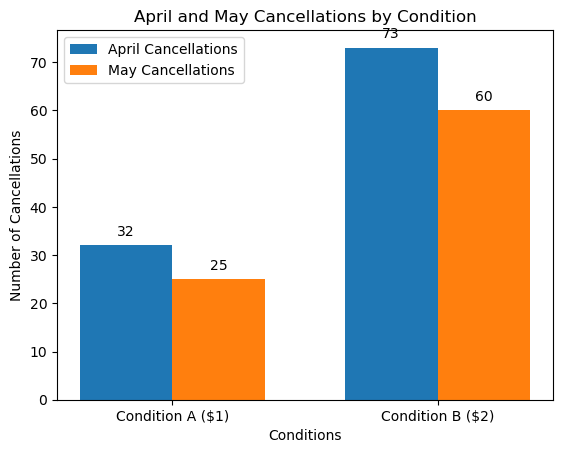

In [25]:
import matplotlib.pyplot as plt

# Cancellations data
conditions = ['Condition A ($1)', 'Condition B ($2)']
april_cancellations = [32, 73]
may_cancellations = [25, 60]

# Creating the bar chart
fig, ax = plt.subplots()

bar_width = 0.35
index = range(len(conditions))

bar1 = ax.bar(index, april_cancellations, bar_width, label='April Cancellations')
bar2 = ax.bar([i + bar_width for i in index], may_cancellations, bar_width, label='May Cancellations')

# Adding labels and titles
ax.set_xlabel('Conditions')
ax.set_ylabel('Number of Cancellations')
ax.set_title('April and May Cancellations by Condition')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(conditions)
ax.legend()

# Add labels (annotations) on top of the bars
for i, v in enumerate(april_cancellations):
    ax.text(i, v + 2, str(v), ha='center')

for i, v in enumerate(may_cancellations):
    ax.text(i + bar_width, v + 2, str(v), ha='center')

plt.show()

In [68]:
# Next Step: Perform a Statistical Test to Compare Cancellations Between Groups
# Now that we have the cancellation counts for both April and May,
# we can perform a Chi-square test to determine if the differences between the two groups (Condition A and Condition B) are statistically significant.
# Step 3: Perform a Chi-square Test for Cancellations
# We’ll do this for both April and May cancellations.

from scipy.stats import chi2_contingency

# Create contingency tables for April and May cancellations
april_contingency_table = pd.crosstab(df['Condition'], df['April_Cancellation'])
may_contingency_table = pd.crosstab(df_may['Condition'], df_may['May_Cancellation'])

# Perform Chi-square test for April cancellations
chi2_april, p_april, dof_april, expected_april = chi2_contingency(april_contingency_table)
print(f"April Chi-square test: Chi2 = {chi2_april}, p-value = {p_april}")

# Perform Chi-square test for May cancellations
chi2_may, p_may, dof_may, expected_may = chi2_contingency(may_contingency_table)
print(f"May Chi-square test: Chi2 = {chi2_may}, p-value = {p_may}")


April Chi-square test: Chi2 = 15.291139068024126, p-value = 9.214774858371609e-05
May Chi-square test: Chi2 = 16.8511077576949, p-value = 4.042972507555213e-05


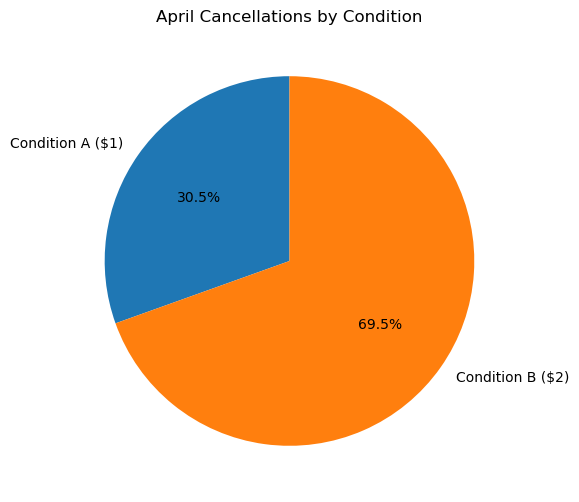

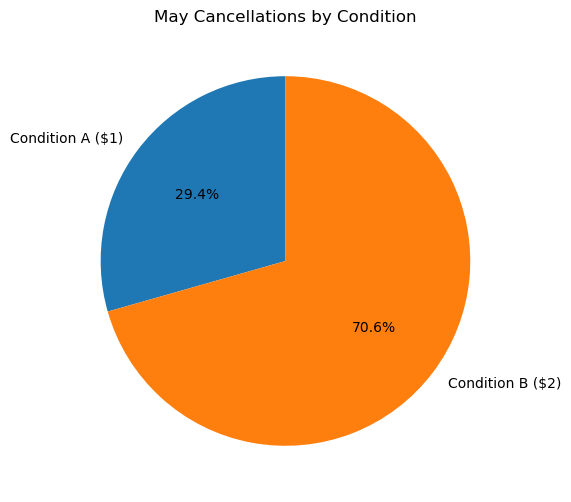

In [27]:
# Pie Charts: April and May Cancellations by Condition
# Objective: Show the percentage of total cancellations that occurred in each condition (A and B) for April and May.
# This will help provide a clear visual summary of the cancellation distribution before and after the price change.
import matplotlib.pyplot as plt

# Pie chart for April cancellations
april_labels = ['Condition A ($1)', 'Condition B ($2)']
april_sizes = [32, 73]
plt.figure(figsize=(6, 6))
plt.pie(april_sizes, labels=april_labels, autopct='%1.1f%%', startangle=90, colors=['#1f77b4', '#ff7f0e'])
plt.title('April Cancellations by Condition')
plt.show()

# Pie chart for May cancellations
may_labels = ['Condition A ($1)', 'Condition B ($2)']
may_sizes = [25, 60]
plt.figure(figsize=(6, 6))
plt.pie(may_sizes, labels=may_labels, autopct='%1.1f%%', startangle=90, colors=['#1f77b4', '#ff7f0e'])
plt.title('May Cancellations by Condition')
plt.show()

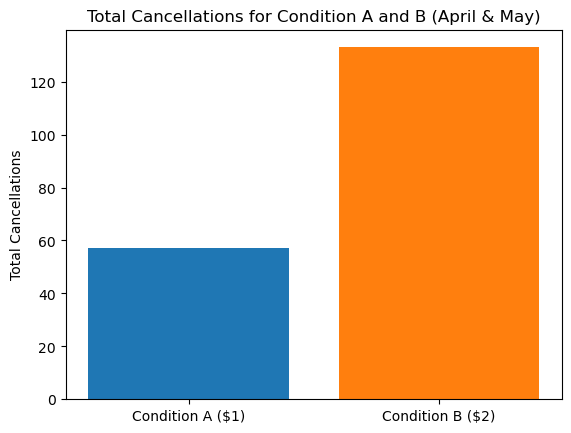

In [70]:
# Bar Chart for Total Cancellations: Summarizing the Overall Impact of Each Condition
# This chart shows the total number of cancellations for each condition ($1 increase vs. $2 increase) across both April and May.
# It provides a quick summary, allowing us to compare the overall cancellation impact of each price increase.

plt.show()
import matplotlib.pyplot as plt

# Data for total cancellations in both conditions
total_cancellations_a = 32 + 25  # Total cancellations for Condition A across April and May
total_cancellations_b = 73 + 60  # Total cancellations for Condition B across April and May

# Conditions and their total cancellations
conditions = ['Condition A ($1)', 'Condition B ($2)']
totals = [total_cancellations_a, total_cancellations_b]

# Create a bar chart for total cancellations
plt.bar(conditions, totals, color=['#1f77b4', '#ff7f0e'])

# Add labels and title
plt.ylabel('Total Cancellations')
plt.title('Total Cancellations for Condition A and B (April & May)')

# Show the plot
plt.show()

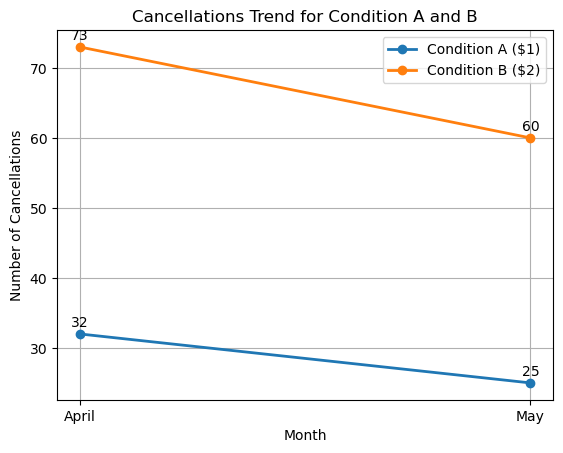

In [29]:
# Next Step: Line Chart for Cancellations Trend. 
# This visualization is to depict the trend of cancellations from April to May for both conditions. 
# This will help demonstrate how cancellations evolved over time for each price increase.
# This line chart will give a clear overview of how cancellations changed between April and May.
# Line chart for trend of cancellations
import matplotlib.pyplot as plt

# Data
months = ['April', 'May']
cancellations_a = [32, 25]
cancellations_b = [73, 60]

# Create the line chart with thicker lines
plt.plot(months, cancellations_a, label='Condition A ($1)', marker='o', color='#1f77b4', linewidth=2)
plt.plot(months, cancellations_b, label='Condition B ($2)', marker='o', color='#ff7f0e', linewidth=2)

# Add labels on the data points for each condition
for i, v in enumerate(cancellations_a):
    plt.text(i, v + 1, str(v), ha='center')

for i, v in enumerate(cancellations_b):
    plt.text(i, v + 1, str(v), ha='center')

# Add grid
plt.grid(True)

# Add titles and labels
plt.xlabel('Month')
plt.ylabel('Number of Cancellations')
plt.title('Cancellations Trend for Condition A and B')

# Display the legend
plt.legend()

# Show the plot
plt.show()

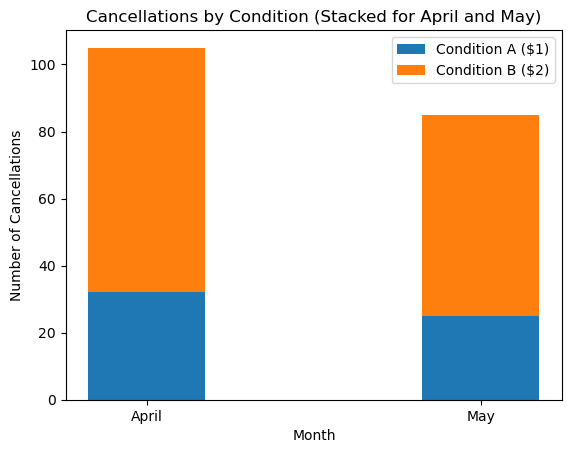

In [74]:
# Stacked Bar Chart: Visualizing Cancellations in April and May for Both Conditions
# This chart shows the breakdown of cancellations in both April and May for each condition ($1 increase vs. $2 increase).
# It helps us see how the cancellations stack up across both months for each price increase, providing a clear view of
# the distribution of cancellations in each month by condition.

import numpy as np
import matplotlib.pyplot as plt

# Cancellations data for April and May
labels = ['April', 'May']
cancellations_a = [32, 25]  # Cancellations for Condition A in April and May
cancellations_b = [73, 60]  # Cancellations for Condition B in April and May

# X-axis positions for the groups
x = np.arange(len(labels))

# Bar width
bar_width = 0.35

# Plotting the stacked bars
plt.bar(x, cancellations_a, width=bar_width, color='#1f77b4', label='Condition A ($1)')
plt.bar(x, cancellations_b, width=bar_width, bottom=cancellations_a, color='#ff7f0e', label='Condition B ($2)')

# Add labels, title, and ticks
plt.xlabel('Month')
plt.ylabel('Number of Cancellations')
plt.title('Cancellations by Condition (Stacked for April and May)')
plt.xticks(x, labels)
plt.legend()

# Show the plot
plt.show()